<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH_BV/blob/main/TiltShiftEffect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

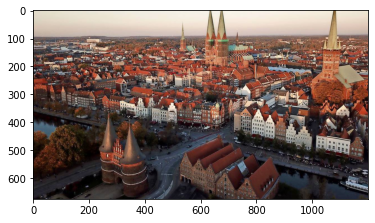

(675, 1200, 3)


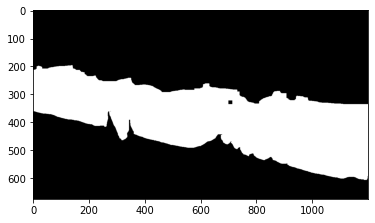

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

image_url = "https://www.ln-online.de/resizer/eNn4ji5O0DnQg_pzMPe_x4eYFRI=/1200x675/filters:quality(70)/cloudfront-eu-central-1.images.arcpublishing.com/madsack/UPSKB72653KNZQBTO4KYPWUQ2U.jpg"
#image_url = "https://upload.wikimedia.org/wikipedia/commons/8/8b/Hauskatze_filou.jpg"
img = io.imread(image_url).astype(np.float32)#[::2,::2]
img -= np.min(img)
img /= np.max(img)


plt.figure()
plt.imshow(img)
plt.show()

def pad_dat_boi(img, n=10):
    h, w, c = img.shape
    padded = np.zeros((h+2*n,w+2*n, c))
    padded[n:h+n, n:w+n] = img
    padded[:n,n:w+n] = img[:n][::-1]
    padded[h+n:,n:w+n] = img[h-n:][::-1]
    padded[:,:n] = padded[:,2*n:n:-1]
    padded[:,n+w-1:] = padded[:,n+w-1:w-2:-1]
    return padded

def conv(img, kernel):
    h, w, c = img.shape
    print(img.shape)
    k = kernel.shape[0]
    img_padded = pad_dat_boi(img, n=int(k/2))
    out = np.zeros((h, w, c))

    #for cc in range(c):
    for xx in range(k):
        for yy in range(k):
            out += kernel[xx,yy]*img_padded[xx:h+xx, yy:w+yy]
    return out

N = 13
base = np.linspace(-2,2, num=N)
glatt = np.exp(-np.sqrt(base[None]**2+base[:,None]**2))
glatt /= np.sum(np.abs(glatt))

maske_v = plt.imread("vordergrund.png")
maske_h = plt.imread("hintergrund.png")
maske_v[maske_v<1] = 0
maske_h[maske_h<1] = 0
maske_v = np.stack(3*[np.min(maske_v, axis=-1)]).transpose(1,2,0)
maske_h = np.stack(3*[np.min(maske_h, axis=-1)]).transpose(1,2,0)
maske_h = conv(maske_h, glatt)
maske = np.clip(maske_v+maske_h, a_min=0, a_max=1)
maske = (maske_v+maske_h)/2
maske[maske<1] = 0
plt.figure()
plt.imshow(maske)
plt.show()

(675, 1200, 3)
(675, 1200, 3)
(675, 1200, 3)
(675, 1200, 3)
(675, 1200, 3)
(675, 1200, 3)
(675, 1200, 3)
(675, 1200, 3)


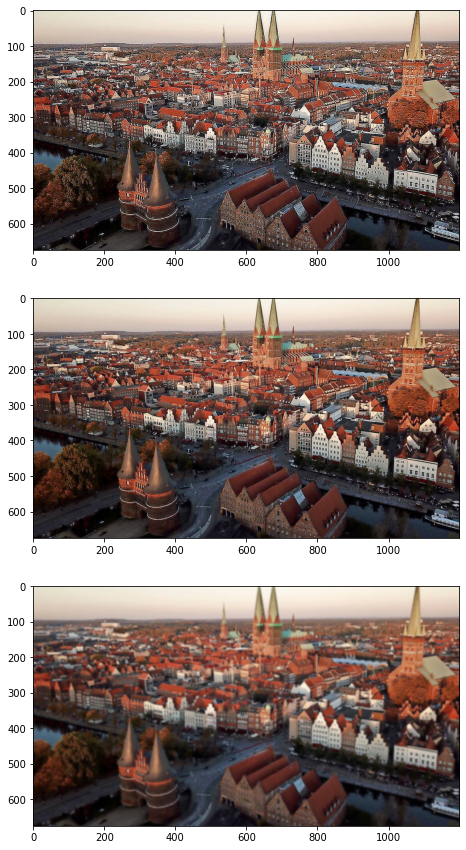

(675, 1200, 3)


TypeError: ignored

In [ ]:
kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
#kernel = 1/15**2*np.ones([15,15])
#N = 5
#kernel = -np.ones([N,N])
#kernel[int(N/2), int(N/2)] = N**2
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=np.float32)
#kernel /= np.sum(np.abs(kernel))

img_sharp = conv(img, kernel)
img_glatt = conv(img, np.array([[1,2,1],[2,4,2],[1,2,1]]))
img_glatt = conv(img_glatt, np.array([[1,2,1],[2,4,2],[1,2,1]]))
img_glatt = conv(img_glatt, np.array([[1,2,1],[2,4,2],[1,2,1]]))
img_glatt = conv(img_glatt, np.array([[1,2,1],[2,4,2],[1,2,1]]))
img_glatt = conv(img_glatt, np.array([[1,2,1],[2,4,2],[1,2,1]]))
img_glatt = conv(img_glatt, np.array([[1,2,1],[2,4,2],[1,2,1]]))
img_glatt = conv(img_glatt, np.array([[1,2,1],[2,4,2],[1,2,1]]))
img_glatt -= np.min(img_glatt)
img_glatt /= np.max(img_glatt)
#img_neu = np.abs(img_neu)
#img_neu = np.sqrt(conv(img, kernel)**2+conv(img, kernel.T)**2)
#img_neu -= np.min(img_neu, axis=(0,1))
#img_neu /= np.max(img_neu, axis=(0,1))
#thresh = 0.3
#img_neu[img_neu>thresh] = 1
#img_neu[img_neu<thresh] = 0
#img_neu = np.max(img_neu, axis=-1)
#img_neu = np.stack(3*[img_neu]).transpose(1,2,0)
plt.figure(figsize=[15,15])
plt.subplot(3,1,1)
plt.imshow(img_sharp)
plt.subplot(3,1,2)
plt.imshow(img)
plt.subplot(3,1,3)
N = 13
base = np.linspace(-2,2, num=N)
glatt = np.exp(-np.sqrt(base[None]**2+base[:,None]**2))
glatt /= np.sum(glatt)
plt.imshow(img_glatt)
plt.show()


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'filter', 'filterargs', 'name']
<function BuiltinFilter.filter at 0x7f86570a39d0>
<function BuiltinFilter.filter at 0x7f86570a39d0>


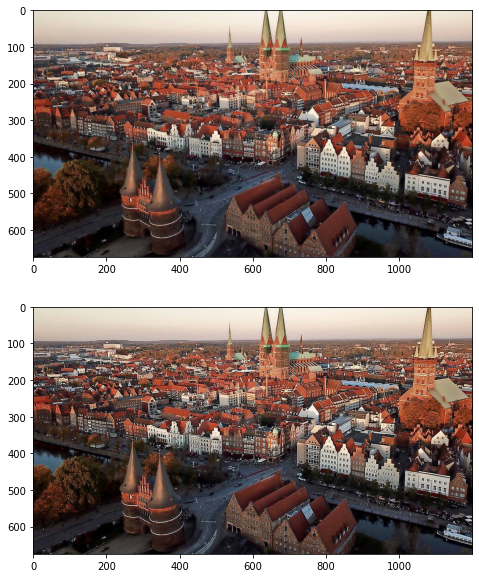

In [ ]:
from PIL import Image, ImageFilter
print(dir(ImageFilter.SHARPEN))
print(ImageFilter.SHARPEN.filter)
print(ImageFilter.SHARPEN.filter)

bla = Image.fromarray(np.uint8(255*img)).filter(ImageFilter.SHARPEN)
plt.figure(figsize=[15,10])
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(bla)
plt.show()

(675, 1200, 3)


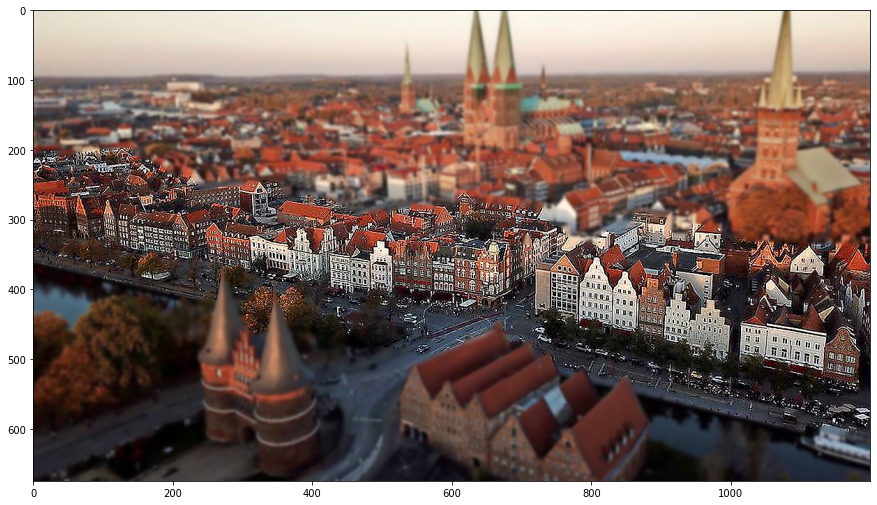

In [ ]:
print(maske.shape)
tilt_shift = (1-maske)*img_glatt+maske*img_sharp
plt.figure(figsize=[15,15])
plt.imshow(tilt_shift)
plt.show()